# Choosing an Ideal Location for a Bakery in the DuPage County Area of Illinois

## Install and import the common libraries for handling data, visualization, and machine learning

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [2]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 94 kB 5.4 MB/s  eta 0:00:01
Libraries imported.


### Obtained data from the 2017 Economic Census for Accommodation and Food Services. Uploaded to personal github and read data into a dataframe

In [3]:
NAICS_data = pd.read_csv('https://raw.githubusercontent.com/OrangeGriffin/Coursera_Capstone/master/CapstoneIndustryData.txt', delimiter='|')

Show the unique categories of of Accomodation and Food Services

In [4]:
NAICS_data.groupby('NAICS2017_TTL').nunique()

,GEOTYPE,ST,COUNTY,PLACE,CONSCITY,CSA,MSA,MD,GEOCOMP,GEO_ID,GEO_TTL,SECTOR,NAICS2017,NAICS2017_TTL,NAICS2017_F,GEO_ID_F,YEAR,FIRM,FIRM_F,ESTAB,ESTAB_F,RCPTOT,RCPTOT_F,PAYANN,PAYANN_F,PAYQTR1,PAYQTR1_F,EMP,EMP_F,RCPTOT_IMP,RCPTOT_IMP_F,PAYANN_IMP,PAYANN_IMP_F,EMP_IMP,EMP_IMP_F
NAICS2017_TTL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accommodation,8,1,75,175,0,12,33,5,2,312,311,1,1,1,0,0,1,49,1,46,1,203,1,200,1,186,1,152,6,1,11,1,9,1,9
Accommodation and food services,8,1,103,554,0,13,35,5,2,792,780,1,1,1,0,0,1,174,1,162,1,621,1,623,1,575,1,499,9,1,9,1,9,1,9
All other traveler accommodation,5,1,2,2,0,3,3,3,2,6,6,1,1,1,0,0,1,3,1,3,1,3,1,4,1,3,1,3,1,1,3,1,2,1,2
Bed-and-breakfast inns,7,1,4,3,0,4,4,3,2,11,11,1,1,1,0,0,1,2,1,2,1,2,1,3,1,2,1,2,2,1,2,1,2,1,2
"Cafeterias, grill buffets, and buffets",7,1,10,3,0,7,8,5,2,23,23,1,1,1,0,0,1,10,1,10,1,13,1,14,1,12,1,13,2,1,5,1,8,1,5
Casino hotels,1,1,1,1,0,1,1,1,1,1,1,1,2,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1
Caterers,8,1,20,44,0,10,13,5,2,91,91,1,2,1,0,0,1,15,1,15,1,35,1,30,1,26,1,27,4,1,6,1,3,1,3
Drinking places (alcoholic beverages),8,1,84,276,0,11,33,5,2,433,428,1,3,1,0,0,1,53,1,51,1,165,1,163,1,126,1,98,5,1,11,1,5,1,8
Food service contractors,8,1,33,83,0,10,21,5,2,159,159,1,2,1,0,0,1,17,1,33,1,70,1,61,1,59,1,58,6,1,8,1,8,1,10


A review of available data for the different places in the DuPage county area showed that data for more specific categories were not always available. Updating dataframe to only show the high-level category of 'Accomation and Food Services.

In [5]:
Illinois_Bakery_Census_Data = NAICS_data.loc[NAICS_data['NAICS2017'] == 72]

In [6]:
Illinois_Bakery_Census_Data

,GEOTYPE,ST,COUNTY,PLACE,CONSCITY,CSA,MSA,MD,GEOCOMP,GEO_ID,GEO_TTL,SECTOR,NAICS2017,NAICS2017_TTL,NAICS2017_F,GEO_ID_F,YEAR,FIRM,FIRM_F,ESTAB,ESTAB_F,RCPTOT,RCPTOT_F,PAYANN,PAYANN_F,PAYQTR1,PAYQTR1_F,EMP,EMP_F,RCPTOT_IMP,RCPTOT_IMP_F,PAYANN_IMP,PAYANN_IMP_F,EMP_IMP,EMP_IMP_F
0,2,17,0,0,NaN,0,0,0,0,0400000US17,Illinois,72,72,Accommodation and food services,NaN,NaN,2017,22369,NaN,29025,NaN,35314396,NaN,10188465,NaN,2375269,NaN,536245,NaN,0,2,0,1,0,1
34,2,17,0,0,NaN,999,99999,99999,G0,04000G0US17,Illinois -- Not in metropolitan or micropolita...,72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,j,0,D,0,D,0,D
63,3,17,1,0,NaN,448,39500,99999,0,0500000US17001,"Adams County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,h,0,D,0,D,0,D
80,3,17,3,0,NaN,164,16020,99999,0,0500000US17003,"Alexander County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,b,0,D,0,D,0,D
85,3,17,5,0,NaN,476,41180,99999,0,0500000US17005,"Bond County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,35,NaN,35,NaN,17678,NaN,4585,NaN,975,NaN,386,NaN,0,1,0,0,0,0
98,3,17,7,0,NaN,466,40420,99999,0,0500000US17007,"Boone County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,62,NaN,64,NaN,46249,NaN,11568,NaN,2665,NaN,932,NaN,0,1,0,1,0,0
112,3,17,9,0,NaN,999,99999,99999,0,0500000US17009,"Brown County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,b,0,D,0,D,0,D
117,3,17,11,0,NaN,176,36860,99999,0,0500000US17011,"Bureau County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,72,NaN,73,NaN,33454,NaN,9059,NaN,2056,NaN,727,NaN,0,1,0,0,0,0
132,3,17,13,0,NaN,476,41180,99999,0,0500000US17013,"Calhoun County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,0,D,0,D,0,D,0,D,0,D,0,c,0,D,0,D,0,D
140,3,17,15,0,NaN,999,99999,99999,0,0500000US17015,"Carroll County, Illinois",72,72,Accommodation and food services,NaN,NaN,2017,41,NaN,41,NaN,20934,NaN,3937,NaN,782,NaN,302,NaN,0,0,0,0,0,0


Cleaning the 'GEO_TTL' column to remove particular terms from text to assist with dataframe merging later in the notebook.

In [7]:
for i in Illinois_Bakery_Census_Data.index:
    if Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('city, Illinois')>-1:
        ind = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('city, Illinois')
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"][0:ind-1]
    elif Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('village, Illinois')>-1:
        ind = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"].find('village, Illinois')
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"][0:ind-1]
    else:
        Illinois_Bakery_Census_Data.at[i, "GEO_TTL"] = Illinois_Bakery_Census_Data.at[i, "GEO_TTL"]
        

Remove a majority of the columns leaving the place, total sales, and annual payroll.

In [8]:
Illinois_Bakery_Census_Data = Illinois_Bakery_Census_Data[['GEO_TTL', 'RCPTOT', 'PAYANN']]

Renaming the GEO_TTL column to Place to assist with merging and analyis later in the notebook.

In [9]:
Illinois_Bakery_Census_Data.rename({'GEO_TTL': 'Place'}, axis='columns', inplace=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Obtained Illinois household income data from the United States Census Bureau. Data is part of the 2019 American Community Survey. Loading and showing the table.

In [44]:
il_inc_data = pd.read_csv('https://github.com/OrangeGriffin/Coursera_Capstone/raw/master/Illinois_Household_Income.csv', delimiter=',')

In [45]:
il_inc_data

,Geographic Area Name,Estimate!!Households!!Mean income (dollars)
0,"Abingdon city, Illinois",49960
1,"Adair CDP, Illinois",82521
2,"Addieville village, Illinois",79494
3,"Addison village, Illinois",84621
4,"Adeline village, Illinois",63942
5,"Albany village, Illinois",72423
6,"Albers village, Illinois",89034
7,"Albion city, Illinois",56765
8,"Aledo city, Illinois",59021
9,"Alexis village, Illinois",62814


Similar to the first table, this table will have columns renamced and the text of the 'Places' cleaned to be the same format as previous table.

In [46]:
il_inc_data.rename({'Geographic Area Name': 'Place', 'Estimate!!Households!!Mean income (dollars)': 'Mean Income' }, axis='columns', inplace=True)

In [47]:
il_inc_data.describe()

,Place,Mean Income
count,1369,1369
unique,1369,1346
top,"Roodhouse city, Illinois",N
freq,1,5


In [48]:
for i in il_inc_data.index:
    if il_inc_data.at[i, "Mean Income"] == 'N':
        il_inc_data = il_inc_data.drop([i])
    elif il_inc_data.at[i, "Mean Income"] == '0':
        il_inc_data = il_inc_data.drop([i])
    else:
        pass

In [49]:
il_inc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1368
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        1364 non-null   object
 1   Mean Income  1364 non-null   object
dtypes: object(2)
memory usage: 72.0+ KB


In [59]:
il_inc_data["Mean Income"] = il_inc_data["Mean Income"].apply(pd.to_numeric)

In [60]:
il_inc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1364 entries, 0 to 1368
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Place        1364 non-null   object
 1   Mean Income  1364 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 72.0+ KB


In [61]:
for i in il_inc_data.index:
    if il_inc_data.at[i, "Place"].find('city, Illinois')>-1:
        ind = il_inc_data.at[i, "Place"].find('city, Illinois')
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"][0:ind-1]
    elif il_inc_data.at[i, "Place"].find('village, Illinois')>-1:
        ind = il_inc_data.at[i, "Place"].find('village, Illinois')
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"][0:ind-1]
    else:
        il_inc_data.at[i, "Place"] = il_inc_data.at[i, "Place"]

### Merge the two tables

In [62]:
combined_data = pd.merge(il_inc_data, Illinois_Bakery_Census_Data, on="Place")

In [63]:
combined_data.head(7)

,Place,Mean Income,RCPTOT,PAYANN
0,Abingdon,49960,2064,640
1,Addison,84621,90961,26163
2,Aledo,59021,5192,1683
3,Algonquin,119324,104308,34120
4,Alsip,74224,51563,13845
5,Alton,53625,87444,26379
6,Amboy,65007,2113,411


### The goal is to find ideal bakery locations within DuPage county. Using BeaitfulSoup, scraped a listing of 'Places' (cities, towns, villages), from the Wikipedia entry for the county.

In [64]:
!pip install BeautifulSoup4

In [65]:
import requests
from bs4 import BeautifulSoup

In [66]:
url = 'https://en.wikipedia.org/wiki/DuPage_County,_Illinois'

In [67]:
page = requests.get(url)

In [68]:
soup = BeautifulSoup(page.text, "html.parser")

In [69]:
places_tags = soup.findAll("div", {"class": "div-col" })

In [70]:
places = []
body = ''

In [71]:
for mytag in places_tags:
    body += mytag.get_text()

In [72]:
places = body.split('\n')

In [73]:
clean_places = []

for item in places:
    txt = ''
    txt = item
    if " (part)" in txt:
        remove_ind = txt.find(" (part)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    elif " (Part)" in txt:
        remove_ind = txt.find(" (Part)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    elif " (mostly)" in txt:
        remove_ind = txt.find(" (mostly)")
        txt = txt[0:remove_ind]
        clean_places.append(txt)
    else:
        clean_places.append(txt)

In [74]:
beg_ind = clean_places.index("Aurora")
clean_places = clean_places[beg_ind:]

In [75]:
for item in clean_places:
    txt = ''
    txt = item
    if txt == '':
        clean_places.remove(item)

In [76]:
places = clean_places

In [77]:
places_df = pd.DataFrame({'Place':places})

In [78]:
places_df.head(7)

,Place
0,Aurora
1,Batavia
2,Chicago
3,Darien
4,Elmhurst
5,Naperville
6,Oakbrook Terrace


#### Merge this dataframe to the comined data from above. Resulting dataframe is only for the places of interest in DuPage county.

In [79]:
dupage_data = pd.merge(places_df, combined_data, on="Place")

In [80]:
# Remove any places where the sales data is 0.
delete_row = dupage_data[dupage_data["RCPTOT"]==0].index
dupage_data = dupage_data.drop(delete_row)

Obtain the latitude and longitude coordinates of each location of the places_df dataframe.

In [81]:
address = 'Darien, Illinois'
    
geolocator = Nominatim(user_agent="DuPage_explorer")
location = geolocator.geocode(address)

In [82]:
latitude = []
longitude = []
for item in places:
    address = item + ", Illinois"
    # initialize your variable to None
    location = None
    geolocator = Nominatim(user_agent="DuPage_explorer")
    location = geolocator.geocode(address)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

In [83]:
places_df = pd.DataFrame({'Place':places, 'latitude':latitude, 'longitude': longitude})

In [84]:
places_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Place      66 non-null     object 
 1   latitude   66 non-null     float64
 2   longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


### Initialize a central location of DuPage county and create a map of the locations in the places_df dataframe

In [85]:
address = "DuPage County, Illinois"

geolocator = Nominatim(user_agent="DuPage_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dupage County is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Dupage County is 41.8603735, -88.0906873.


In [86]:
# create map of New York using latitude and longitude values
map_dupage = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, place in zip(places_df['latitude'], places_df['longitude'], places_df['Place']):
    label = '{}'.format(place)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dupage)  
    
map_dupage

## Using the Foursquare API, will retrieve the venues found in each of the locations in the places_df dataframe

In [87]:
#@hidden_cell
CLIENT_ID = 'WillThisBeHidden' # your Foursquare ID
CLIENT_SECRET = 'ProbablyNot' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [88]:
d_lat = places_df.iloc[0][1]
d_long = places_df.iloc[0][2]

In [89]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    d_lat, 
    d_long, 
    radius, 
    LIMIT)

In [90]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603fa8b66231b0194868f679'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Aurora',
  'headerFullLocation': 'Downtown Aurora, Aurora',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': 41.761670104500006,
    'lng': -88.30873277561963},
   'sw': {'lat': 41.7526700955, 'lng': -88.32077502438037}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4adccf11f964a5200a3021e3',
       'name': 'Paramount Theatre',
       'location': {'address': '23 E Galena Blvd',
        'crossStreet': 'at Water St.',
        'lat': 41.75741437862337,
        'lng': -88.31493829505156,
        'labeledLatL

In [91]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

In [92]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [93]:
dupage_venues = getNearbyVenues(names=places_df['Place'],
                                   latitudes=places_df['latitude'],
                                   longitudes=places_df['longitude']
                                  )

Aurora
Batavia
Chicago
Darien
Elmhurst
Naperville
Oakbrook Terrace
St. Charles
Warrenville
West Chicago
Wheaton
Wood Dale
Addison
Bartlett
Bensenville
Bloomingdale
Bolingbrook
Burr Ridge
Carol Stream
Clarendon Hills
Downers Grove
Elk Grove Village
Glendale Heights
Glen Ellyn
Hanover Park
Hinsdale
Itasca
Lemont
Lisle
Lombard
Oak Brook
Roselle
Schaumburg
Villa Park
Wayne
Westmont
Willowbrook
Willow Springs
Winfield
Woodridge
Belmont
Cloverdale
Eola
Butterfield
Flowerfield
Fullersburg
Keeneyville
Lace
Lakewood
Mammoth Springs
Medinah
Munger
North Glen Ellyn
Palisades
South Elmhurst
Swift
York Center
Addison Township
Bloomingdale Township
Downers Grove Township
Lisle Township
Milton Township
Naperville Township
Wayne Township
Winfield Township
York Township


In [94]:
dupage_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aurora,41.757170,-88.314754,Paramount Theatre,41.757414,-88.314938,Theater
1,Aurora,41.757170,-88.314754,Gillerson's,41.759606,-88.315031,Pub
2,Aurora,41.757170,-88.314754,Endiro Coffee,41.759559,-88.314812,Café
3,Aurora,41.757170,-88.314754,Tecalitlan Restaurant,41.756192,-88.313986,Mexican Restaurant
4,Aurora,41.757170,-88.314754,Ballydoyle Irish Pub,41.759348,-88.315126,Pub
5,Aurora,41.757170,-88.314754,La Quinta De Los Reyes,41.758603,-88.312294,Mexican Restaurant
6,Aurora,41.757170,-88.314754,Taqueria El Tio & Restaurant,41.757515,-88.319157,Mexican Restaurant
7,Aurora,41.757170,-88.314754,Riverfront Playhouse,41.757061,-88.313964,Theater
8,Aurora,41.757170,-88.314754,SciTech Hands On Museum,41.756344,-88.318203,Science Museum
9,Aurora,41.757170,-88.314754,Holiday Inn Express & Suites,41.759361,-88.309838,Hotel


In [95]:
dupage_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Addison,25,25,25,25,25,25
Addison Township,84,84,84,84,84,84
Aurora,28,28,28,28,28,28
Bartlett,15,15,15,15,15,15
Batavia,23,23,23,23,23,23
Belmont,52,52,52,52,52,52
Bensenville,15,15,15,15,15,15
Bloomingdale,21,21,21,21,21,21
Bloomingdale Township,42,42,42,42,42,42


In [96]:
print('There are {} uniques categories.'.format(len(dupage_venues['Venue Category'].unique())))

There are 239 uniques categories.


In [97]:
dupage_venues.rename({'Neighborhood': 'Place'}, axis='columns', inplace=True)

In [98]:
# one hot encoding
dupage_onehot = pd.get_dummies(dupage_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dupage_onehot['Place'] = dupage_venues['Place'] 

# move neighborhood column to the first column
fixed_columns = [dupage_onehot.columns[-1]] + list(dupage_onehot.columns[:-1])
dupage_onehot = dupage_onehot[fixed_columns]

dupage_onehot.head()

,Place,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tiki Bar,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [99]:
dupage_grouped = dupage_onehot.groupby('Place').mean().reset_index()
dupage_grouped

,Place,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tiki Bar,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Addison,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.040000,0.000000,0.000000,0.040000,0.040000,0.040000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.040000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00

In [100]:
num_top_venues = 5

for place in dupage_grouped['Place']:
    print("----"+place+"----")
    temp = dupage_grouped[dupage_grouped['Place'] == place].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Addison----
                venue  freq
0         Pizza Place  0.16
1      Ice Cream Shop  0.12
2  Italian Restaurant  0.08
3  Mexican Restaurant  0.08
4     Thai Restaurant  0.08


----Addison Township----
                   venue  freq
0                    Bar  0.08
1             Sports Bar  0.08
2            Pizza Place  0.06
3                Gay Bar  0.05
4  General Entertainment  0.04


----Aurora----
                venue  freq
0  Mexican Restaurant  0.18
1             Theater  0.11
2                 Pub  0.07
3         Pizza Place  0.07
4               Plaza  0.04


----Bartlett----
                venue  freq
0         Pizza Place  0.13
1  Italian Restaurant  0.07
2           BBQ Joint  0.07
3            Creperie  0.07
4      Sandwich Place  0.07


----Batavia----
                venue  freq
0          Taco Place  0.09
1         Pizza Place  0.09
2         Coffee Shop  0.09
3  Italian Restaurant  0.04
4            Pharmacy  0.04


----Belmont----
                 venue  fre

                venue  freq
0    Storage Facility  0.25
1          Donut Shop  0.25
2               Motel  0.25
3  Chinese Restaurant  0.25
4                 ATM  0.00


----West Chicago----
                venue  freq
0                 ATM   0.1
1             Theater   0.1
2  Mexican Restaurant   0.1
3                 Gym   0.1
4           Pet Store   0.1


----Westmont----
                venue  freq
0  Italian Restaurant  0.08
1      Ice Cream Shop  0.08
2          Playground  0.08
3         Pizza Place  0.08
4  Chinese Restaurant  0.08


----Wheaton----
                venue  freq
0    Asian Restaurant  0.06
1  Italian Restaurant  0.04
2      Ice Cream Shop  0.04
3     Thai Restaurant  0.04
4        Burger Joint  0.04


----Willow Springs----
                     venue  freq
0       Italian Restaurant   0.2
1                      Bar   0.2
2      American Restaurant   0.2
3  Health & Beauty Service   0.2
4                     Food   0.2


----Willowbrook----
         venue  freq
0 

In [101]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [102]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Place']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
places_venues_sorted = pd.DataFrame(columns=columns)
places_venues_sorted['Place'] = dupage_grouped['Place']

for ind in np.arange(dupage_grouped.shape[0]):
    places_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dupage_grouped.iloc[ind, :], num_top_venues)

places_venues_sorted.head()

,Place,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Addison,Pizza Place,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Thai Restaurant,Donut Shop,Supermarket,Other Great Outdoors,Bar,Bakery
1,Addison Township,Bar,Sports Bar,Pizza Place,Gay Bar,General Entertainment,Sandwich Place,Baseball Stadium,Restaurant,Coffee Shop,Mexican Restaurant
2,Aurora,Mexican Restaurant,Theater,Pub,Pizza Place,Ice Cream Shop,Café,Plaza,Brazilian Restaurant,Casino,Chinese Restaurant
3,Bartlett,Pizza Place,Italian Restaurant,Pharmacy,Gift Shop,Liquor Store,Sandwich Place,BBQ Joint,Mexican Restaurant,Train Station,Chinese Restaurant
4,Batavia,Taco Place,Pizza Place,Coffee Shop,Italian Restaurant,Salon / Barbershop,Bank,Bar,Breakfast Spot,Chinese Restaurant,Record Shop


In [103]:
learning_df = pd.merge(dupage_grouped, dupage_data, on="Place")

In [107]:
learning_df.dtypes

Place                                        object
ATM                                         float64
Accessories Store                           float64
American Restaurant                         float64
Antique Shop                                float64
Arcade                                      float64
Arepa Restaurant                            float64
Art Gallery                                 float64
Art Museum                                  float64
Arts & Crafts Store                         float64
Asian Restaurant                            float64
Athletics & Sports                          float64
Auto Workshop                               float64
Automotive Shop                             float64
BBQ Joint                                   float64
Bagel Shop                                  float64
Bakery                                      float64
Bank                                        float64
Bar                                         float64
Baseball Fie

In [108]:
from sklearn.preprocessing import StandardScaler
X = learning_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-0.28429397, -0.22620479,  0.23411401, ..., -0.78257475,
        -0.1849979 , -0.18482201],
       [-0.28429397, -0.22620479, -0.66620835, ..., -0.57853579,
        -0.08991782, -0.10101888],
       [-0.28429397, -0.22620479, -0.66620835, ..., -0.03456052,
        -0.20996066, -0.20887501],
       ...,
       [-0.28429397, -0.22620479, -0.66620835, ...,  0.17445451,
        -0.22270261, -0.22237657],
       [-0.28429397, -0.22620479, -0.66620835, ..., -0.65323769,
        -0.19854398, -0.21058969],
       [-0.28429397, -0.22620479, -0.66620835, ..., -0.36322451,
        -0.19508833, -0.19270883]])

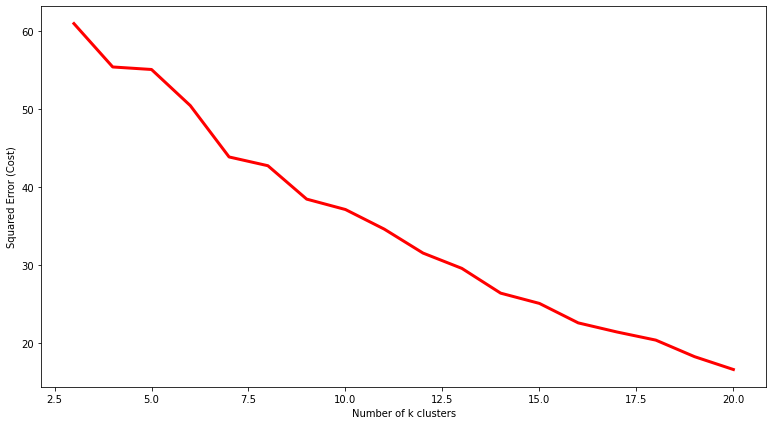

In [109]:
from sklearn.cluster import KMeans

error_cost=[]

for i in range(3, 21):
    KM = KMeans(n_clusters=i, max_iter=100)
    try:
        KM.fit(Clus_dataSet)
    except ValueError:
        print('Error on line', i)
        
    # calculate squared error for the clustered points
    error_cost.append(KM.inertia_ / 100)

# plot the K values against the squared error cost
plt.figure(figsize=(13,7))
plt.plot(range(3,21), error_cost, color='r', linewidth=3)
plt.xlabel('Number of k clusters')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)

plt.show()

In [110]:
# set number of clusters
kclusters = 6

learning_df_clustering = learning_df.drop('Place', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(learning_df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 0, 0, 0, 2, 3, 0, 1], dtype=int32)

In [111]:
# add clustering labels
learning_df.insert(0, 'Cluster Labels', kmeans.labels_)

In [112]:
dupage_merged = places_df
#dupage_merged

learning_df
# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
dupage_merged = dupage_merged.join(learning_df.set_index('Place'), on='Place')

dupage_merged.head() # check the last columns!

,Place,latitude,longitude,Cluster Labels,ATM,Accessories Store,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Casino,Chinese Restaurant,Church,City,Clothing Store,Coffee Shop,College Gym,Comedy Club,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Exhibit,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health & Beauty Service,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Luggage Store,Market,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Optical Shop,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Rest Area,Restaurant,River,Road,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shop & Service,Shopping Plaza,Skate Park,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stables,Steakhouse,Storage Facility,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tiki Bar,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Mean Income,RCPTOT,PAYANN
0,Aurora,41.757170,-88.314754,2.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.035714,0.0,0.00,0.00,0.0,0.0,0.035714,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.0,0.0,0.035714,0.0,0.00,0.0,0.0,0.035714,0.035714,0.0,0.0,0.0,0.035714,0.000000,0.0,0.0,0.00,0.035714,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.00,0.00,0.000000,0.035714,0.035714,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00

In [113]:
!pip install folium

In [114]:
import folium

In [115]:
dupage_merged = dupage_merged.dropna()

In [116]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dupage_merged['latitude'], dupage_merged['longitude'], dupage_merged['Place'], dupage_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster-1)],
        fill=True,
        fill_color=rainbow[int(cluster-1)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [117]:
dupage_merged.dtypes

Place                                        object
latitude                                    float64
longitude                                   float64
Cluster Labels                              float64
ATM                                         float64
Accessories Store                           float64
American Restaurant                         float64
Antique Shop                                float64
Arcade                                      float64
Arepa Restaurant                            float64
Art Gallery                                 float64
Art Museum                                  float64
Arts & Crafts Store                         float64
Asian Restaurant                            float64
Athletics & Sports                          float64
Auto Workshop                               float64
Automotive Shop                             float64
BBQ Joint                                   float64
Bagel Shop                                  float64
Bakery      

In [118]:
dupage_merged.loc[dupage_merged['Cluster Labels'] == 0]
clust_0 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 0]
clust_0 = clust_0[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_0 = clust_0.join(places_venues_sorted.set_index('Place'), on='Place')
clust_0

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Batavia,122297.0,66089.0,19141.0,Taco Place,Pizza Place,Coffee Shop,Italian Restaurant,Salon / Barbershop,Bank,Bar,Breakfast Spot,Chinese Restaurant,Record Shop
3,Darien,122374.0,42610.0,11462.0,Other Repair Shop,Burrito Place,Italian Restaurant,Bank,Donut Shop,Pharmacy,Cosmetics Shop,Salon / Barbershop,Fast Food Restaurant,Coffee Shop
4,Elmhurst,163347.0,128273.0,37225.0,Pizza Place,Italian Restaurant,Coffee Shop,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Gym,Beer Bar,Bar,Brewery
6,Oakbrook Terrace,89327.0,75321.0,22104.0,Men's Store,Gastropub,Park,Seafood Restaurant,Sporting Goods Shop,Mattress Store,Pizza Place,Warehouse Store,Clothing Store,Juice Bar
8,Warrenville,101357.0,61053.0,17710.0,Donut Shop,Pharmacy,Home Service,Pizza Place,Dive Bar,Yoga Studio,Flea Market,Flower Shop,Food,Food & Drink Shop
9,West Chicago,99419.0,37194.0,10673.0,ATM,Art Gallery,Theater,Coffee Shop,Pet Store,Gym,Mexican Restaurant,Pizza Place,Jewelry Store,Dessert Shop
11,Wood Dale,90989.0,63772.0,11000.0,Bar,Italian Restaurant,Train Station,Ice Cream Shop,Greek Restaurant,Gas Station,Pet Store,Pizza Place,Sandwich Place,Breakfast Spot
12,Addison,84621.0,90961.0,26163.0,Pizza Place,Ice Cream Shop,Italian Restaurant,Mexican Restaurant,Thai Restaurant,Donut Shop,Supermarket,Other Great Outdoors,Bar,Bakery
13,Bartlett,121450.0,40857.0,12009.0,Pizza Place,Italian Restaurant,Pharmacy,Gift Shop,Liquor Store,Sandwich Place,BBQ Joint,Mexican Restaurant,Train Station,Chinese Restaurant
14,Bensenville,76195.0,27835.0,6203.0,Park,Mexican Restaurant,Deli / Bodega,Gas Station,Grocery Store,Food,Baseball Field,Bar,Multiplex,Bank


In [119]:
clust_1 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 1]
clust_1 = clust_1[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_1 = clust_1.join(places_venues_sorted.set_index('Place'), on='Place')
clust_1

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Chicago,90713.0,12308450.0,3607438.0,Coffee Shop,Hotel,Sandwich Place,Museum,Bookstore,Boutique,Pizza Place,Garden,Music Venue,Dance Studio


In [120]:
clust_2 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 2]
clust_2 = clust_2[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_2 = clust_2.join(places_venues_sorted.set_index('Place'), on='Place')
clust_2

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aurora,94667.0,281801.0,75477.0,Mexican Restaurant,Theater,Pub,Pizza Place,Ice Cream Shop,Café,Plaza,Brazilian Restaurant,Casino,Chinese Restaurant
7,St. Charles,127698.0,257979.0,67715.0,Italian Restaurant,Bar,Mexican Restaurant,Café,Pub,Pizza Place,New American Restaurant,Sushi Restaurant,Ice Cream Shop,Hobby Shop
16,Bolingbrook,107741.0,195044.0,55574.0,Fast Food Restaurant,Rental Car Location,Grocery Store,Burrito Place,Cosmetics Shop,Snack Place,Chinese Restaurant,Pizza Place,Food,Financial or Legal Service
20,Downers Grove,121832.0,199162.0,56304.0,Italian Restaurant,Coffee Shop,Pizza Place,Sandwich Place,American Restaurant,Bakery,Ice Cream Shop,Restaurant,Record Shop,Pub
21,Elk Grove Village,100592.0,158715.0,50282.0,Hotel,Sandwich Place,Pub,Motel,Hardware Store,Construction & Landscaping,Strip Club,Smoke Shop,Donut Shop,Yoga Studio
29,Lombard,100270.0,236727.0,71199.0,American Restaurant,Wine Bar,Park,Italian Restaurant,Bank,Diner,Pizza Place,Pharmacy,Convenience Store,Donut Shop


In [121]:
clust_3 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 3]
clust_3 = clust_3[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_3 = clust_3.join(places_venues_sorted.set_index('Place'), on='Place')
clust_3

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Burr Ridge,249719.0,43004.0,13875.0,Clothing Store,Sushi Restaurant,Mexican Restaurant,Bank,Italian Restaurant,Cycle Studio,Bus Station,Shopping Plaza,Café,Seafood Restaurant
19,Clarendon Hills,192865.0,8605.0,2445.0,Pizza Place,Mexican Restaurant,Coffee Shop,Sandwich Place,Flower Shop,Train Station,Platform,Deli / Bodega,Ice Cream Shop,American Restaurant
25,Hinsdale,305922.0,45249.0,14981.0,Bakery,Yoga Studio,Pizza Place,Boutique,Shipping Store,Bank,Bar,Sandwich Place,Salon / Barbershop,Salad Place


In [122]:
clust_4 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 4]
clust_4 = clust_4[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_4 = clust_4.join(places_venues_sorted.set_index('Place'), on='Place')
clust_4

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Oak Brook,236686.0,297884.0,95335.0,Luggage Store,Business Service,Hotel Pool,Yoga Studio,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck


In [123]:
clust_5 = dupage_merged.loc[dupage_merged['Cluster Labels'] == 5]
clust_5 = clust_5[["Place", "Mean Income", "RCPTOT", "PAYANN"]]
clust_5 = clust_5.join(places_venues_sorted.set_index('Place'), on='Place')
clust_5

,Place,Mean Income,RCPTOT,PAYANN,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Naperville,154724.0,575534.0,181857.0,Mexican Restaurant,Cosmetics Shop,American Restaurant,Bar,Pizza Place,Clothing Store,Ice Cream Shop,Sandwich Place,Coffee Shop,Kitchen Supply Store
32,Schaumburg,97942.0,627748.0,181395.0,Performing Arts Venue,Coffee Shop,Fast Food Restaurant,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Fountain,Football Stadium,Food Truck,Food Court


In [124]:
clust_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 5 to 32
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Place                   2 non-null      object 
 1   Mean Income             2 non-null      float64
 2   RCPTOT                  2 non-null      float64
 3   PAYANN                  2 non-null      float64
 4   1st Most Common Venue   2 non-null      object 
 5   2nd Most Common Venue   2 non-null      object 
 6   3rd Most Common Venue   2 non-null      object 
 7   4th Most Common Venue   2 non-null      object 
 8   5th Most Common Venue   2 non-null      object 
 9   6th Most Common Venue   2 non-null      object 
 10  7th Most Common Venue   2 non-null      object 
 11  8th Most Common Venue   2 non-null      object 
 12  9th Most Common Venue   2 non-null      object 
 13  10th Most Common Venue  2 non-null      object 
dtypes: float64(3), object(11)
memory usage: 240.0

In [128]:
clust_analysis = dupage_merged[["Cluster Labels", "Place", "Mean Income", "RCPTOT", "PAYANN"]]

In [142]:
clust_mean = clust_analysis.groupby('Cluster Labels').agg(['mean'])
clust_mean

,Mean Income,RCPTOT,PAYANN
,mean,mean,mean
Cluster Labels,,,
0.0,106612.478261,6.113748e+04,1.666526e+04
1.0,90713.000000,1.230845e+07,3.607438e+06
2.0,108800.000000,2.215713e+05,6.275850e+04
3.0,249502.000000,3.228600e+04,1.043367e+04
4.0,236686.000000,2.978840e+05,9.533500e+04
5.0,126333.000000,6.016410e+05,1.816260e+05


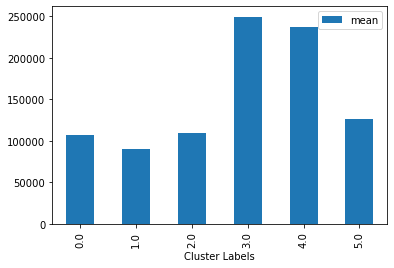

In [143]:
clust_mean["Mean Income"].plot(kind = "bar")
plt.show()

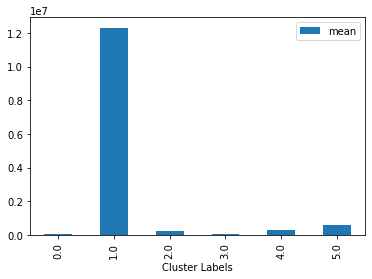

In [146]:
clust_mean["RCPTOT"].plot(kind="bar")

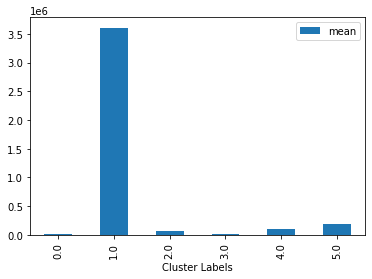

In [147]:
clust_mean["PAYANN"].plot(kind="bar")

In [156]:
clust_mean.dtypes

Mean Income  mean    float64
RCPTOT       mean    float64
PAYANN       mean    float64
dtype: object

In [157]:
# Remove any places where the sales data is 0.
delete_row = clust_analysis[clust_analysis["Cluster Labels"]==1.0].index
clust_analysis = clust_analysis.drop(delete_row)

# Remove any places where the sales data is 0.
#delete_row = dupage_data[dupage_data["RCPTOT"]==0].index
#dupage_data = dupage_data.drop(delete_row)

In [158]:
clust_mean = clust_analysis.groupby('Cluster Labels').agg(['mean'])
clust_mean

,Mean Income,RCPTOT,PAYANN
,mean,mean,mean
Cluster Labels,,,
0.0,106612.478261,61137.478261,16665.260870
2.0,108800.000000,221571.333333,62758.500000
3.0,249502.000000,32286.000000,10433.666667
4.0,236686.000000,297884.000000,95335.000000
5.0,126333.000000,601641.000000,181626.000000


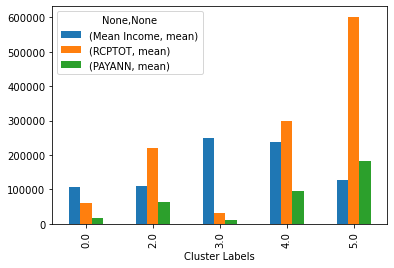

In [162]:
clust_mean.plot(kind="bar")